# How does the age of the pilot affect the probability of having an accident? 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

from flight_safety.queries import get_flight_crew_accidents

In [3]:
con = sqlite3.connect('data/avall.db')

In [4]:
flight_crew = get_flight_crew_accidents(con)

## Age distribution of pilots who have had an accident 

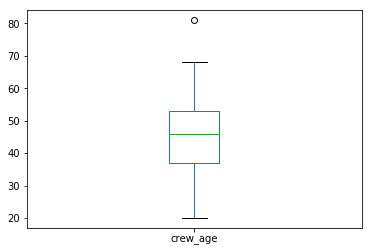

In [5]:
flight_crew.crew_age.plot(kind='box');

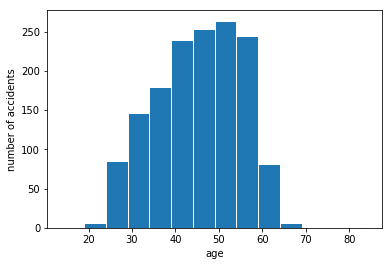

In [6]:
age_bins = np.arange(14, 85, 5)
flight_crew['crew_age'].hist(bins=age_bins, ec='white', grid=False)
plt.xlabel('age')
plt.ylabel('number of accidents');

## Number of licenses per age 

Active FAA Pilot Certificates Held by Category and Age Group of Holder  according to [GAMMA databook](http://www.gama.aero/files/GAMA_2015_Databook_LoRes%20updated%203-29-2016.pdf http://www.gama.aero/media-center/industry-facts-and-statistics/statistical-databook-and-industry-outlook#year2015)

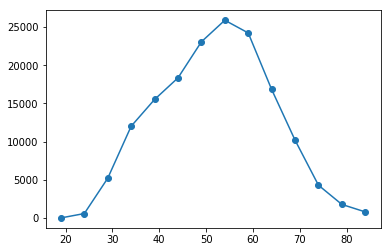

In [7]:
licenses_by_age_airline = np.array(
    [0, 572, 5199, 12003, 15507, 18337,
     23058, 25882, 24220, 16824, 10184,
     4284, 1766, 787]
)

plt.plot(age_bins[1:], licenses_by_age_airline, 'o-');

## Accidents per license rate

In [8]:
age_group = pd.cut(flight_crew['crew_age'], age_bins)
gby_age = flight_crew['ev_id'].groupby(age_group).count()

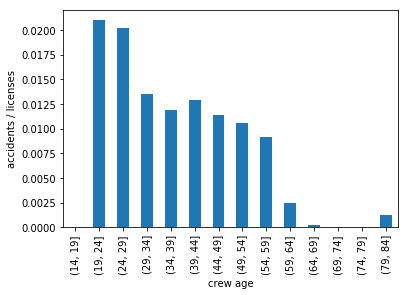

In [9]:
accident_rate_age = gby_age / licenses_by_age_airline
accident_rate_age.plot.bar()
plt.ylabel('accidents / licenses')
plt.xlabel('crew age');

It seems that some people have investigated this issue before:
> [...] the accident rate of airline transport rated (ATR) pilots aged 55–59 is approximately one-third of that of pilots with the same rating who are aged 20–24.

Handbook of Aviation Human Factors, Second Edition. John A. Wise,V. David Hopkin,Daniel J. 